In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np

In [10]:
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 784).astype('float32')
train_images = (train_images - 127.5) / 127.5

In [11]:
def build_generator():
    model = models.Sequential([
        layers.Dense(256, input_dim=100, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(1024, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(784, activation='tanh')
    ])
    return model

In [12]:
def build_discriminator():
    model = models.Sequential([
        layers.Dense(1024, input_dim=784, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

In [13]:
def build_gan(generator, discriminator):
    model = models.Sequential([
        generator,
        discriminator
    ])
    return model

In [14]:
def visualize_generated_images(epoch, generator, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, [examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28, 28)
    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


def get_generated_images(epoch, generator, examples=10):
    noise = np.random.normal(0, 1, [examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28, 28)
    return generated_images


def display_generated_images(generated_images_dict, examples=10, dim=(1, 10)):
    for epoch, images in generated_images_dict.items():
        print(f"Epoch: {epoch}")
        plt.figure(figsize=(10, 1))
        for i in range(examples):
            plt.subplot(dim[0], dim[1], i+1)
            plt.imshow(images[i], interpolation='nearest', cmap='gray_r')
            plt.axis('off')
        plt.tight_layout()
        plt.show()



1/1 [==============================] - 0s 232ms/step
0 [D loss: 0.659102663397789 | D accuracy: 40.625] [G loss: 0.30211710929870605]
1/1 [==============================] - 0s 26ms/step


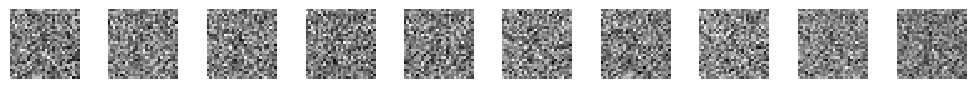

1/1 [==============================] - 0s 23ms/step
1000 [D loss: 0.4383532702922821 | D accuracy: 84.375] [G loss: 1.2810885906219482]
1/1 [==============================] - 0s 22ms/step


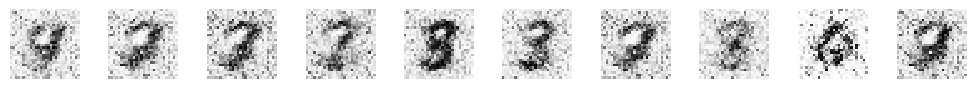

1/1 [==============================] - 0s 22ms/step
2000 [D loss: 0.5750763714313507 | D accuracy: 65.625] [G loss: 1.3007807731628418]
1/1 [==============================] - 0s 24ms/step


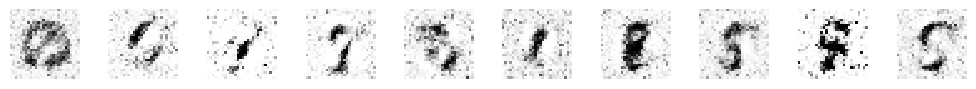

1/1 [==============================] - 0s 23ms/step
3000 [D loss: 0.6336545646190643 | D accuracy: 64.0625] [G loss: 1.080029845237732]
1/1 [==============================] - 0s 26ms/step


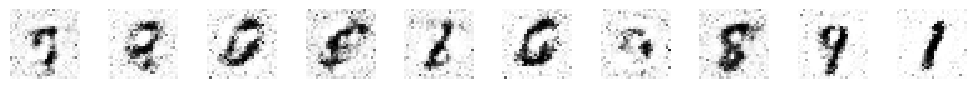

1/1 [==============================] - 0s 24ms/step
4000 [D loss: 0.6281726658344269 | D accuracy: 65.625] [G loss: 0.8565312623977661]
1/1 [==============================] - 0s 24ms/step


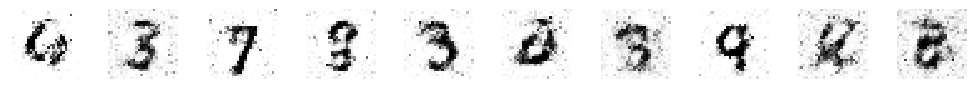

1/1 [==============================] - 0s 25ms/step
5000 [D loss: 0.5923939943313599 | D accuracy: 62.5] [G loss: 0.8110207319259644]
1/1 [==============================] - 0s 23ms/step


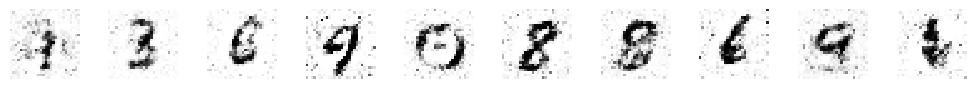

1/1 [==============================] - 0s 26ms/step
6000 [D loss: 0.6523830592632294 | D accuracy: 70.3125] [G loss: 0.8184570074081421]
1/1 [==============================] - 0s 22ms/step


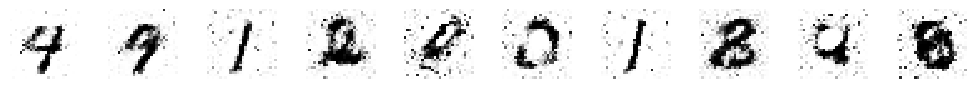

1/1 [==============================] - 0s 22ms/step
7000 [D loss: 0.6314993500709534 | D accuracy: 65.625] [G loss: 0.7503856420516968]
1/1 [==============================] - 0s 22ms/step


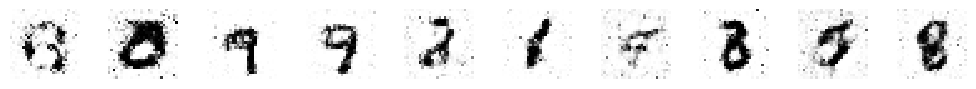

1/1 [==============================] - 0s 24ms/step
8000 [D loss: 0.6668002009391785 | D accuracy: 64.0625] [G loss: 0.7312785387039185]
1/1 [==============================] - 0s 25ms/step


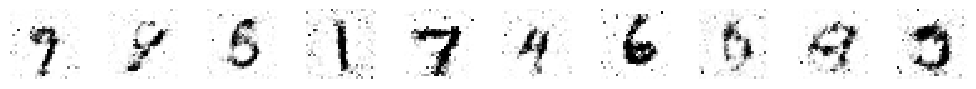

1/1 [==============================] - 0s 34ms/step
9000 [D loss: 0.7025480270385742 | D accuracy: 45.3125] [G loss: 0.7175609469413757]
1/1 [==============================] - 0s 36ms/step


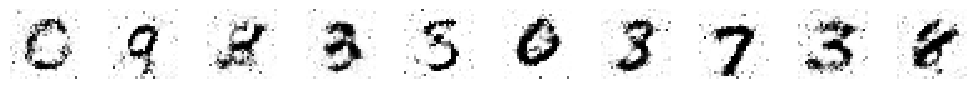

1/1 [==============================] - 0s 24ms/step
10000 [D loss: 0.6826464831829071 | D accuracy: 56.25] [G loss: 0.7134000062942505]
1/1 [==============================] - 0s 23ms/step


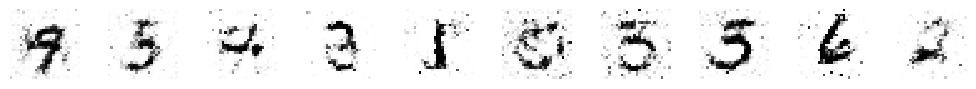

1/1 [==============================] - 0s 24ms/step
11000 [D loss: 0.6759107410907745 | D accuracy: 57.8125] [G loss: 0.7141163349151611]
1/1 [==============================] - 0s 23ms/step


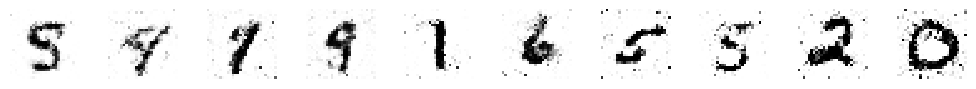

1/1 [==============================] - 0s 40ms/step
12000 [D loss: 0.7041261196136475 | D accuracy: 35.9375] [G loss: 0.7184056639671326]
1/1 [==============================] - 0s 35ms/step


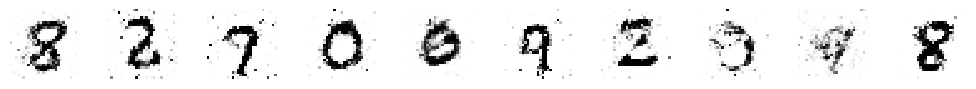

1/1 [==============================] - 0s 33ms/step
13000 [D loss: 0.6857866644859314 | D accuracy: 51.5625] [G loss: 0.7025372982025146]
1/1 [==============================] - 0s 24ms/step


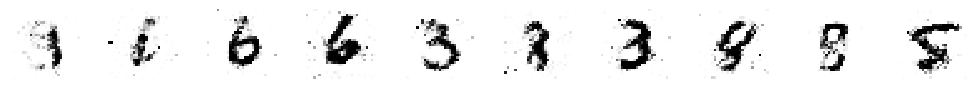

1/1 [==============================] - 0s 22ms/step
14000 [D loss: 0.6922832131385803 | D accuracy: 56.25] [G loss: 0.708952009677887]
1/1 [==============================] - 0s 23ms/step


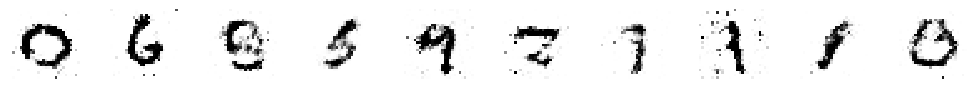

1/1 [==============================] - 0s 23ms/step
15000 [D loss: 0.6975282430648804 | D accuracy: 43.75] [G loss: 0.7115287780761719]
1/1 [==============================] - 0s 23ms/step


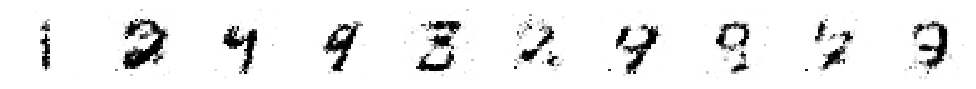

1/1 [==============================] - 0s 28ms/step
16000 [D loss: 0.6936159431934357 | D accuracy: 48.4375] [G loss: 0.7210620641708374]
1/1 [==============================] - 0s 22ms/step


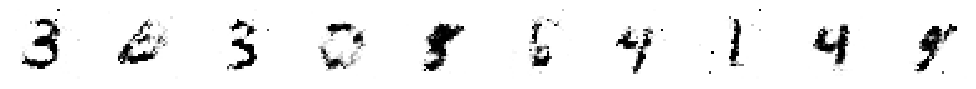

1/1 [==============================] - 0s 26ms/step
17000 [D loss: 0.6996649503707886 | D accuracy: 40.625] [G loss: 0.7202242016792297]
1/1 [==============================] - 0s 25ms/step


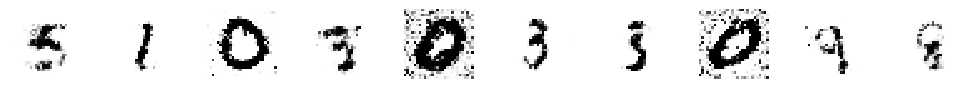

1/1 [==============================] - 0s 23ms/step
18000 [D loss: 0.6897890269756317 | D accuracy: 54.6875] [G loss: 0.7197397947311401]
1/1 [==============================] - 0s 25ms/step


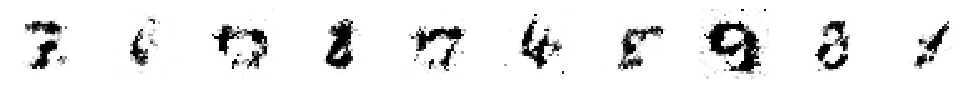

1/1 [==============================] - 0s 24ms/step
19000 [D loss: 0.6939315497875214 | D accuracy: 50.0] [G loss: 0.7137205004692078]
1/1 [==============================] - 0s 33ms/step


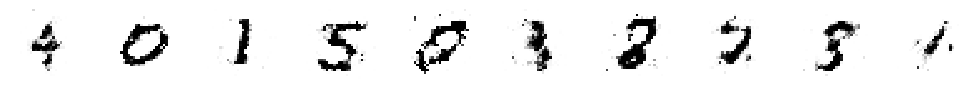

1/1 [==============================] - 0s 34ms/step
19999 [D loss: 0.6942346096038818 | D accuracy: 51.5625] [G loss: 0.7126713991165161]


In [15]:
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(0.0002, 0.5), metrics=['accuracy'])

generator = build_generator()

discriminator.trainable = False

gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(0.0002, 0.5))


discriminator_losses = []
generator_losses = []
generated_images_dict = {}

epochs = 20000
batch_size = 64
half_batch = batch_size // 2

for epoch in range(epochs):

    idx = np.random.randint(0, train_images.shape[0], half_batch)
    imgs = train_images[idx]

    noise = np.random.normal(0, 1, (half_batch, 100))
    gen_imgs = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
    d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.normal(0, 1, (batch_size, 100))
    valid_y = np.array([1] * batch_size)
    g_loss = gan.train_on_batch(noise, valid_y)

    discriminator_losses.append(d_loss[0])
    generator_losses.append(g_loss)

    if epoch % 1000 == 0:
        print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100*d_loss[1]}] [G loss: {g_loss}]")
        generated_images_dict[epoch] = get_generated_images(epoch, generator)
        visualize_generated_images(epoch, generator)

print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100*d_loss[1]}] [G loss: {g_loss}]")

Epoch: 0


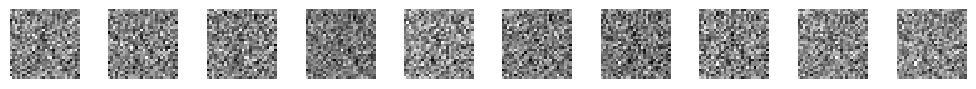

Epoch: 1000


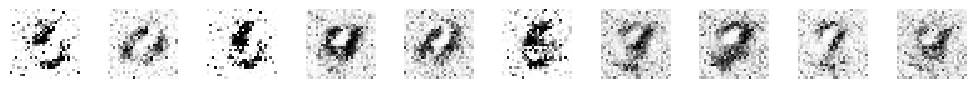

Epoch: 2000


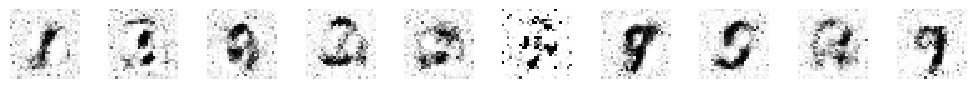

Epoch: 3000


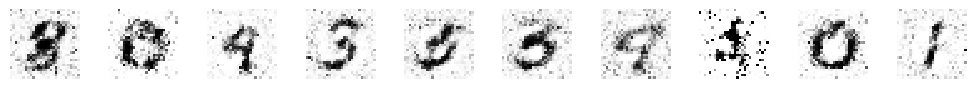

Epoch: 4000


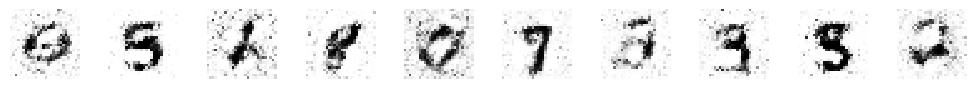

Epoch: 5000


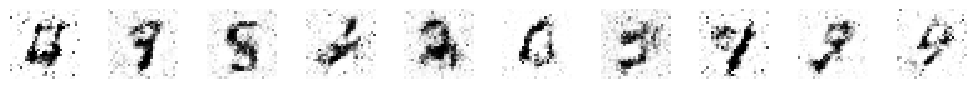

Epoch: 6000


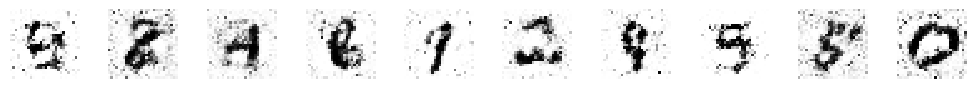

Epoch: 7000


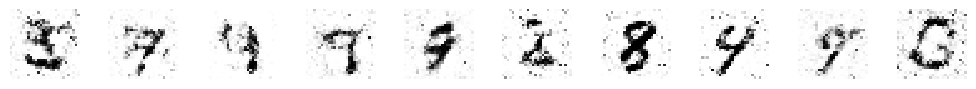

Epoch: 8000


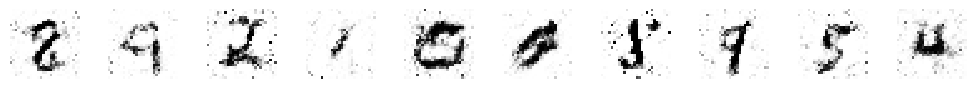

Epoch: 9000


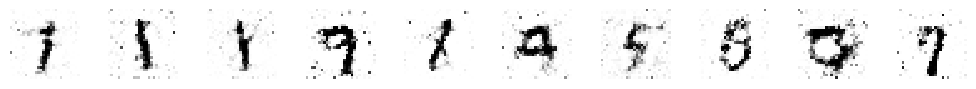

Epoch: 10000


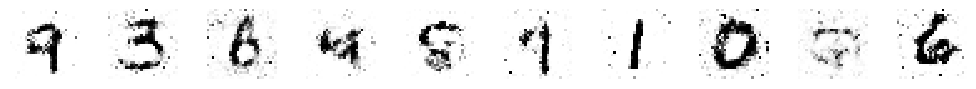

Epoch: 11000


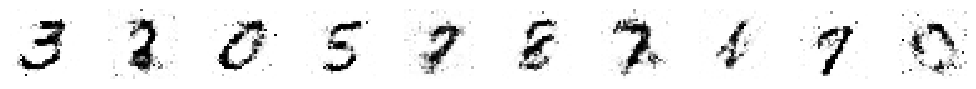

Epoch: 12000


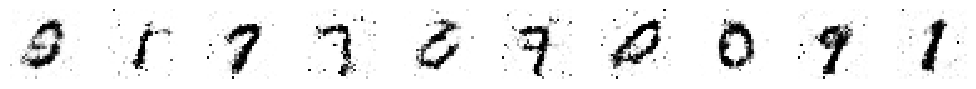

Epoch: 13000


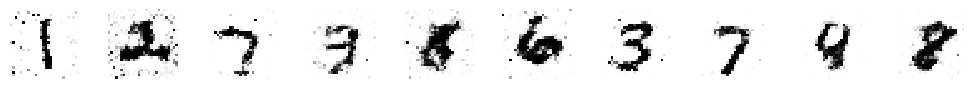

Epoch: 14000


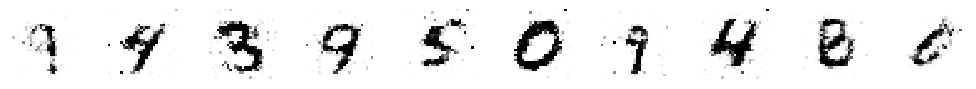

Epoch: 15000


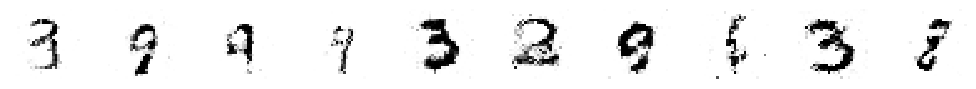

Epoch: 16000


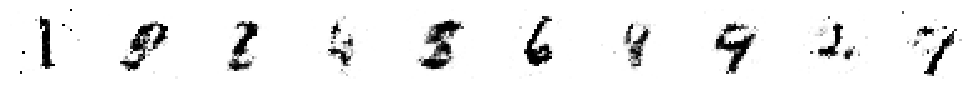

Epoch: 17000


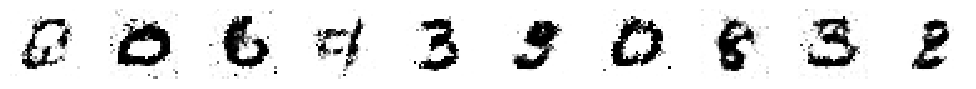

Epoch: 18000


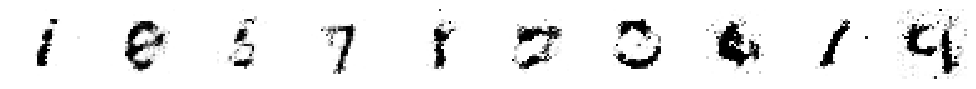

Epoch: 19000


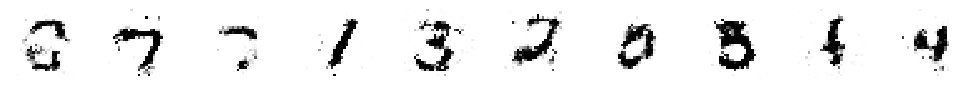

In [16]:
display_generated_images(generated_images_dict)

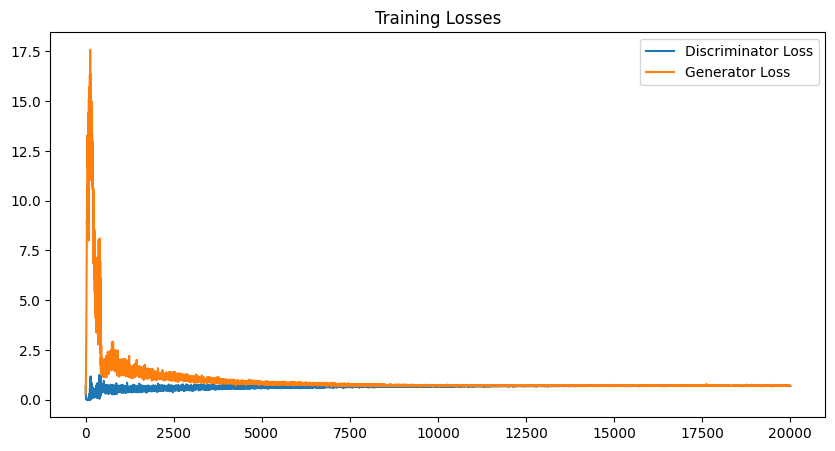

In [17]:
plt.figure(figsize=(10,5))

plt.plot(discriminator_losses, label='Discriminator Loss')
plt.plot(generator_losses, label='Generator Loss')
plt.title("Training Losses")
plt.legend()
plt.show()